### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [59]:
import math
sq2=math.sqrt(2)
ba=math.sqrt(2)
n=0
while n<11:
    ba=math.pow(sq2,ba)
    n=n+1
ba
    

1.9921908829470578

In [58]:
sq2=2**0.5
n=0
while n<10:
    sq2=(2**0.5)**sq2
    n+=1
sq2

1.988711773413954

### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [72]:
import numpy as np
class coin(object):
    def __init__(self,p):
        self.prob_heads=p
        
    def flip_is_head(self):
        return np.random.random()<self.prob_heads
    
    def __repr__(self):
        return 'coin with p='+str(self.prob_heads)
    
class Bag_of_coins(object):
    def __init__(self):
        self.coins=[]
        
    def add_coin(self,coin):
        self.coins.append(coin)
        
    def pick_random_coin(self):
        return np.random.choice(self.coins)

bag=Bag_of_coins()

# x=coin(0.8)
# bag.add_coin(x)

bag.add_coin(coin(0.4))
bag.add_coin(coin(0.6))

bag.pick_random_coin()

num_trials=1000
trial_ctr=0
head_ctr=0
while trial_ctr < num_trials:
    pig=bag.pick_random_coin()
    if pig.flip_is_head():
        trial_ctr+=1
        if pig.flip_is_head():
            head_ctr+=1
head_ctr/trial_ctr


0.512

In [70]:
import numpy as np
class Coin(object):
    def __init__(self, p):
        self.prob_heads = p
        
    def flip_is_head(self):
         return np.random.random() < self.prob_heads
    
    def __repr__(self):
        return 'Coin wih p = ' + str(self.prob_heads)
    
class Bag_of_Coins(object):
    def __init__(self):
        self.coins = []
        
    def add_coin(self, coin):
        self.coins.append(coin)
    
    def pick_random_coin(self):
        return np.random.choice(self.coins)
    
bag = Bag_of_Coins()
bag.add_coin(Coin(0.4))
bag.add_coin(Coin(0.6))
bag.pick_random_coin()

num_trials = 10000
trial_ctr = 0 # trial count
head_ctr = 0 # head count
while trial_ctr < num_trials:
    coin = bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr += 1
        if coin.flip_is_head():
            head_ctr += 1
head_ctr / trial_ctr

0.5168

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

In [40]:
import random
n=0
count=0
while count<=1:
    ran=random.uniform(0,1)
    count+=ran
    n+=1
n

2

In [46]:
import numpy as np

num_trials=10

def simulate_number_of_spins_to_exceed_one():
    sum_=0
    count=0
    while sum_<=1:
        sum_+=np.random.random()
        count+=1
    return count
# end up with a list of the number of spins on each trial
trials=[simulate_number_of_spins_to_exceed_one() for _ in range(num_trials)]
np.mean(trials)

2.8999999999999999

2.6920000000000002

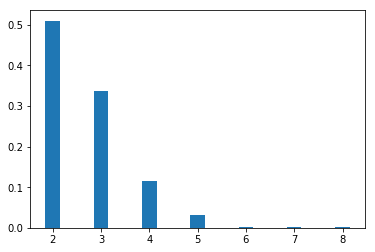

In [55]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

num_trials=1000

def sim_num_of_spins_to_exceed_one():
    sum_=0
    count=0
    while sum_<=1:
        sum_+=np.random.random()
        count+=1
    return count
# end up with a list of the number of spins on each trial
trials=[sim_num_of_spins_to_exceed_one() for _ in range(num_trials)]
num_bins=np.max(trials)-np.min(trials)+1
plt.hist(trials,bins=num_bins,normed=True,
        align='left',rwidth=0.3,range=(2,2+num_bins))

np.mean(trials)

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 3.12
This is based on a Goldman Sachs interview question. You play a game where you toss two fair coins in the air. You always win $1. However, if you have tossed 2 heads at least once, and 2 tails at least once, you surrender all winnings, and cannot play again. You may stop playing at anytime. What’s your strategy?

Populating the interactive namespace from numpy and matplotlib


2.4500000000000002

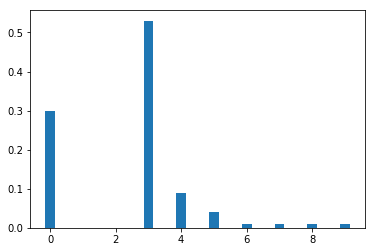

In [2]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

class TwoDiceGame(object):
    def play(self):
        winnings = 0
        two_of_same_seen = False
        while True:
            if two_of_same_seen:
                if winnings >= 3:
                    # our strategy: quit if we have 3+ in this case
                    return winnings
                if np.random.randint(4) == 0:
                    # bad luck: both HH and TT seen, lost it all
                    return 0
            else:
                two_of_same_seen = np.random.randint(2) == 0
            winnings += 1

game = TwoDiceGame()
num_trials = 100
trials = [game.play() for _ in range(num_trials)]
num_bins = np.max(trials)-np.min(trials)+1
plt.hist(trials,bins=num_bins,normed = True,
        align = 'left',rwidth = 0.3,range = (0,num_bins))

np.mean(trials)

### 5.2
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?